In [125]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

In [126]:
df_summary = pd.read_json('mmd_summary_new.json')
df_summary = df_summary[df_summary.n_basis == 5]

# auxs = ['/home/diego/storage/generative-glm/experiments/figure4/' + 'dic_sd2.pk', 
#         '/home/diego/storage/generative-glm/experiments/figure4/' + 'dic_sd2_2.pk']

# for ii, aux in enumerate(auxs):
#     with open(aux, "rb") as fit_file:
#         dic_sd2 = pickle.load(fit_file)
#     _dfsd2 = pd.DataFrame.from_dict(dic_sd2, orient='index')
#     _dfsd2 = _dfsd2.rename({0: 'sd2'}, axis=1)
#     if ii == 0:
#         dfsd2 = _dfsd2.copy()
#     else:
#         dfsd2 = dfsd2.append(_dfsd2)
# df = df.join(dfsd2, on='dtime')

## phi_mean

In [19]:
df = df_summary.loc[(df_summary.ker_name == 'phi_mean_fr')]# & (df.initialization == 'ml')]

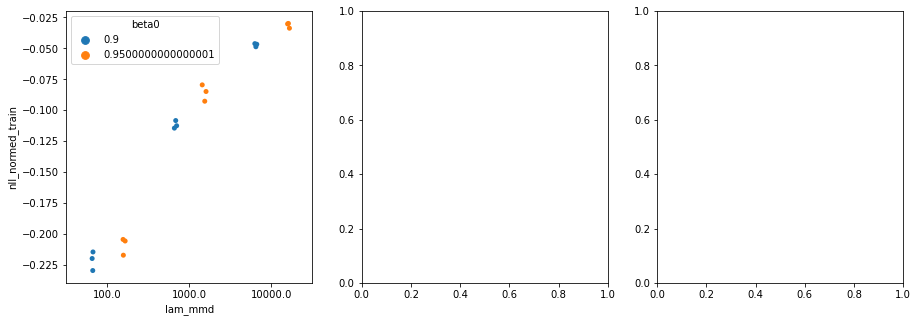

In [34]:
data = df[df.nll_normed_train < 0].copy()
data = data[data.num_epochs.isin([200]) & data.lr.isin([2e-2]) & (data.n_batch_fr == 800)]
# data = data[data.lam_mmd == 1e3]
# data = data.groupby([])
# data = data[(data.beta0 == 0)]
# data = data[(data.beta1 == 0)]

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)

sns.stripplot(x='lam_mmd', y='nll_normed_train', hue='beta0', dodge=True, data=data[data.initialization == 'zero'], ax=ax1)
# sns.stripplot(x='beta1', y='nll_normed_train', hue='initialization', data=data[data.lam_mmd == 2000], ax=ax2)
# sns.scatterplot(x='nll_normed_train', y='fr_max_mean', hue='initialization', data=data, ax=ax3)

# ax1.set_xscale('log')

# display(data.loc[(data.nll_normed_train - -0.15).abs() < 0.02, ['mmd_mean', 'nll_normed_train', 'mmd_sd', 'lam_mmd', 'num_epochs', 'beta0', 'beta1', 'n_batch_fr', 'fr_mean_mean', 'fr_max_mean', 'initialization']])

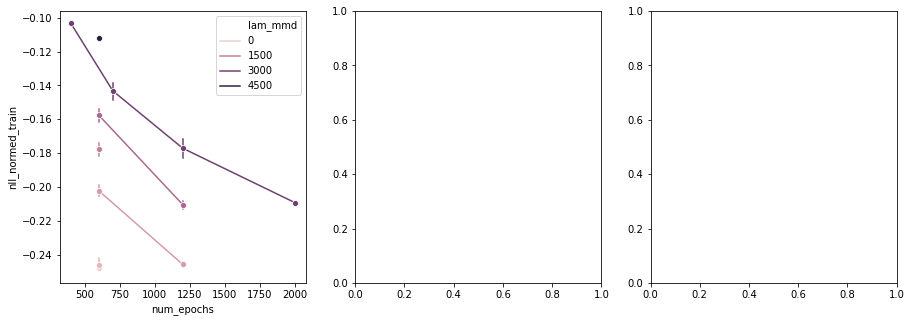

In [30]:
data = df[df.nll_normed_train < 0].copy()
data = data[data.lr.isin([1e-2]) & (data.n_batch_fr == 800) & (data.initialization == 'zero')]
# data = data[(data.num_epochs == 700) & (data.n_batch_fr == 400)]
data = data[(data.beta0 == 0)]
data = data[(data.beta1 == 0)]
data['lam_mmd'] = data['lam_mmd'].astype(int)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)

sns.lineplot(x='num_epochs', y='nll_normed_train', marker='o', err_style='bars', hue='lam_mmd', data=data, ax=ax1)
# sns.stripplot(x='beta1', y='nll_normed_train', hue='initialization', data=data[data.lam_mmd == 2000], ax=ax2)
# sns.scatterplot(x='nll_normed_train', y='fr_max_mean', hue='initialization', data=data, ax=ax3)

# ax2.set_xscale('log')

# display(data.loc[(data.nll_normed_train - -0.15).abs() < 0.02, ['mmd_mean', 'nll_normed_train', 'mmd_sd', 'lam_mmd', 'num_epochs', 'beta0', 'beta1', 'n_batch_fr', 'fr_mean_mean', 'fr_max_mean', 'initialization']])

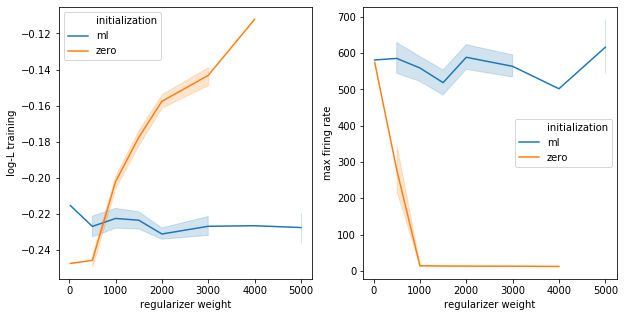

In [87]:
data = df[df.nll_normed_train < 0].copy()
data = data[data.num_epochs.isin([600, 700]) & data.lr.isin([1e-2]) & (data.n_batch_fr == 800)]
# data = data[data.num_epochs.isin([1200]) & data.lr.isin([5e-2]) & (data.n_batch_fr == 800)]
# data = data[(data.num_epochs == 700) & (data.n_batch_fr == 400)]
data = data[(data.beta0 == 0)]
data = data[(data.beta1 == 0)]

fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2)

sns.lineplot(x='lam_mmd', y='nll_normed_train', hue='initialization', data=data, ax=ax1)
sns.lineplot(x='lam_mmd', y='fr_max_mean', hue='initialization', data=data, ax=ax2)

ax1.set_ylabel('log-L training')
ax2.set_ylabel('max firing rate')

for ax in (ax1, ax2):
    ax.set_xlabel('regularizer weight')
    
# ax2.set_xscale('log')

# display(data.loc[(data.nll_normed_train - -0.15).abs() < 0.02, ['mmd_mean', 'nll_normed_train', 'mmd_sd', 'lam_mmd', 'num_epochs', 'beta0', 'beta1', 'n_batch_fr', 'fr_mean_mean', 'fr_max_mean', 'initialization']])

In [76]:
data = df[df.nll_normed_train < 0].copy()
data = data[(data.initialization == 'zero') & (data.lam_mmd == 2e3) & (data.lr != 1e-2) & data.num_epochs.isin([1200]) & ~(data.file_name.isna())]
pk_f = data.iloc[0].file_name

IndexError: single positional indexer is out-of-bounds

In [75]:
data

,file_name,server,dtime,idx_train,idx_val,mmd_ker,ker_name,n_basis,last_peak,num_epochs,...,mmd_mean,mmd_sd,params_grad_mean,params_grad_cov,fr_mean_mean,fr_mean_sd,fr_max_mean,fr_max_sd,initialization,kernel_kwargs
3015,mmd_phi_mean_fr_lammmd2000.0biasedTrue_epochs6...,erdos,2020/9/10-17:6:56,"[100, 102, 104, 106, 108, 110, 112, 114, 116, ...","[101, 103, 105, 107, 109, 111, 113, 115, 117, ...",score_function,phi_mean_fr,6,60,600,...,0.008432,0.00881,"[1275.8593060302735, -70.61720290184022, -27.3...","[[2965792.608176639, -166602.18392821253, -598...",4.612293,0.076817,14.859504,2.119895,zero,None


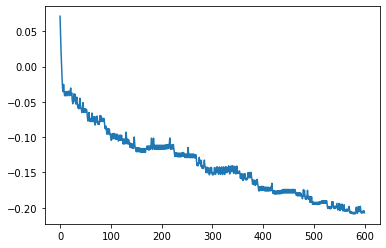

In [68]:
path = '/home/diego/storage/generative-glm/experiments/figure4/' + pk_f
with open(path, "rb") as fit_file:
    dic = pickle.load(fit_file)

fig, ax = plt.subplots()    
ax.plot(dic['nll_train'])

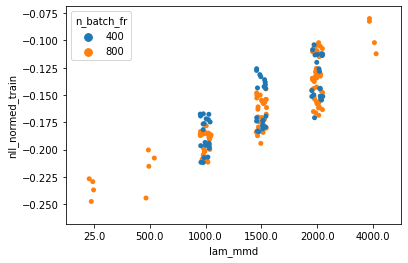

In [9]:
_data = data[(data.initialization == 'zero') & (data.beta0 == 0) & data.biased]
# _data.groupby('beta1')[['nll_normed_train']].mean()
_data[['mmd_mean', 'nll_normed_train', 'mmd_sd', 'lam_mmd', 'beta0', 'beta1', 'n_batch_fr', 'fr_mean_mean', 'fr_max_mean', 'initialization']]
_data['nll_normed_train'].agg(['mean', 'std'])

sns.stripplot(x='lam_mmd', y='nll_normed_train', hue='n_batch_fr', data=_data)#[data.initialization == 'zero'])

## phi_autocor

In [107]:
df = df_summary.loc[(df_summary.ker_name == 'phi_autocor')]

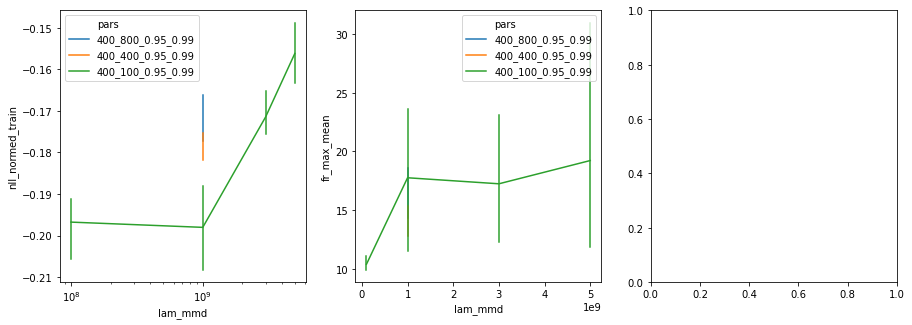

In [108]:
data = df[df.nll_normed_train < 0].copy()
data = data[(data.initialization == 'zero') & (data.lr == 1e-2)]
data['pars'] = data.num_epochs.astype(str).str[:] + '_' + data.n_batch_fr.astype(str).str[:] + '_' + data.beta0.round(2).astype(str).str[:] + '_' + data.beta1.round(2).astype(str).str[:]

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)

sns.lineplot(x='lam_mmd', y='nll_normed_train', hue='pars', err_style='bars', ci=95, data=data, ax=ax1)
sns.lineplot(x='lam_mmd', y='fr_max_mean', hue='pars', err_style='bars', ci=95, data=data, ax=ax2)

ax1.set_xscale('log')

## phi_autocor_history

In [113]:
df = df_summary.loc[(df_summary.ker_name == 'phi_autocor_history')]

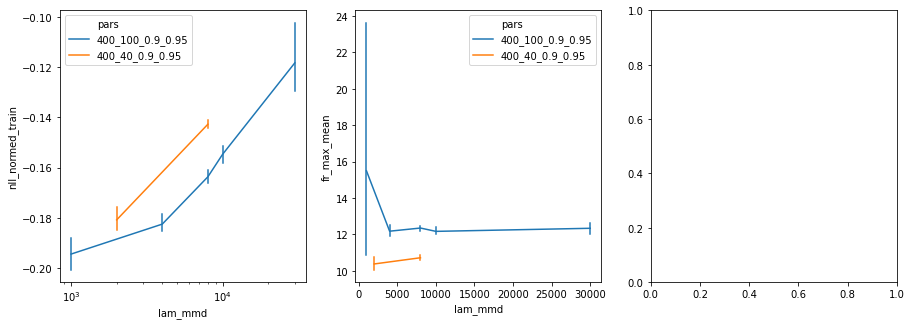

In [114]:
data = df[df.nll_normed_train < 0].copy()
# data = data[((data.initialization == 'ml') & (data.lr == 4e-3) & ((data.beta0 - 0.9).abs() < 1e-3) & ((data.beta1 - 0.95).abs() < 1e-3)) |\
#             ((data.initialization == 'zero') & (data.lr == 1e-2))]
data = data[(data.initialization == 'zero') & (data.lr == 1e-2)]
data['pars'] = data.num_epochs.astype(str).str[:] + '_' + data.n_batch_fr.astype(str).str[:] + '_' + data.beta0.round(2).astype(str).str[:] + '_' + data.beta1.round(2).astype(str).str[:]
# data = data[data.num_epochs.isin([400]) & (data.n_batch_fr == 40)]
# data = data[(data.num_epochs == 700) & (data.n_batch_fr == 400)]
# data = data[(data.beta0 - 0.95).abs() < 1e-3]
# data = data[(data.beta1 - 0.99).abs() < 1e-3]

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)

sns.lineplot(x='lam_mmd', y='nll_normed_train', hue='pars', err_style='bars', ci=95, data=data, ax=ax1)
sns.lineplot(x='lam_mmd', y='fr_max_mean', hue='pars', err_style='bars', ci=95, data=data, ax=ax2)

ax1.set_xscale('log')

# display(data.loc[(data.nll_normed_train - -0.15).abs() < 0.02, ['mmd_mean', 'nll_normed_train', 'mmd_sd', 'lam_mmd', 'num_epochs', 'beta0', 'beta1', 'n_batch_fr', 'fr_mean_mean', 'fr_max_mean', 'initialization']])

## phi_mean_history

In [127]:
df = df_summary.loc[(df_summary.ker_name == 'phi_mean_history')]

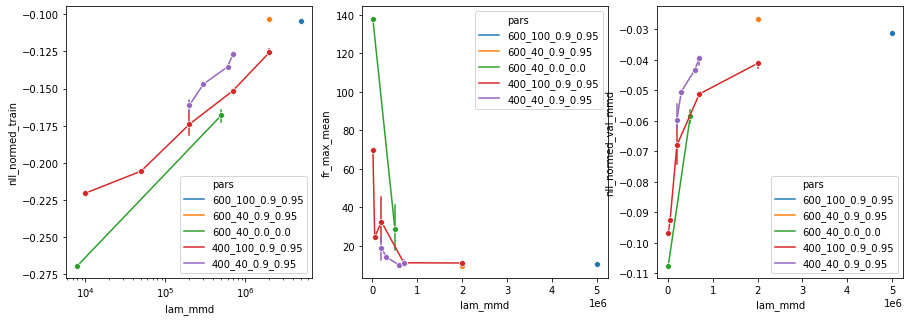

In [128]:
data = df[df.nll_normed_train < 0].copy()
# data = data[((data.initialization == 'ml') & (data.lr == 4e-3) & ((data.beta0 - 0.9).abs() < 1e-3) & ((data.beta1 - 0.95).abs() < 1e-3)) |\
#             ((data.initialization == 'zero') & (data.lr == 1e-2))]
data = data[(data.initialization == 'zero') & (data.lr == 1e-2)]
data['pars'] = data.num_epochs.astype(str).str[:] + '_' + data.n_batch_fr.astype(str).str[:] + '_' + data.beta0.round(2).astype(str).str[:] + '_' + data.beta1.round(2).astype(str).str[:]
# data = data[data.num_epochs.isin([400]) & (data.n_batch_fr == 40)]
# data = data[(data.num_epochs == 700) & (data.n_batch_fr == 400)]
# data = data[(data.beta0 - 0.95).abs() < 1e-3]
# data = data[(data.beta1 - 0.99).abs() < 1e-3]

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)

sns.lineplot(x='lam_mmd', y='nll_normed_train', hue='pars', err_style='bars', marker='o', ci=95, data=data, ax=ax1)
sns.lineplot(x='lam_mmd', y='fr_max_mean', hue='pars', err_style='bars',  marker='o', ci=95, data=data, ax=ax2)
sns.lineplot(x='lam_mmd', y='nll_normed_val_mmd', hue='pars', estimator=np.median, err_style='bars',  marker='o', ci=95, data=data, ax=ax3)

ax1.set_xscale('log')

# display(data.loc[(data.nll_normed_train - -0.15).abs() < 0.02, ['mmd_mean', 'nll_normed_train', 'mmd_sd', 'lam_mmd', 'num_epochs', 'beta0', 'beta1', 'n_batch_fr', 'fr_mean_mean', 'fr_max_mean', 'initialization']])

## phi_psth

In [115]:
df = df_summary.loc[(df_summary.ker_name == 'phi_psth')]

In [116]:
df = df[~df.kernel_kwargs.str[0].isna()]

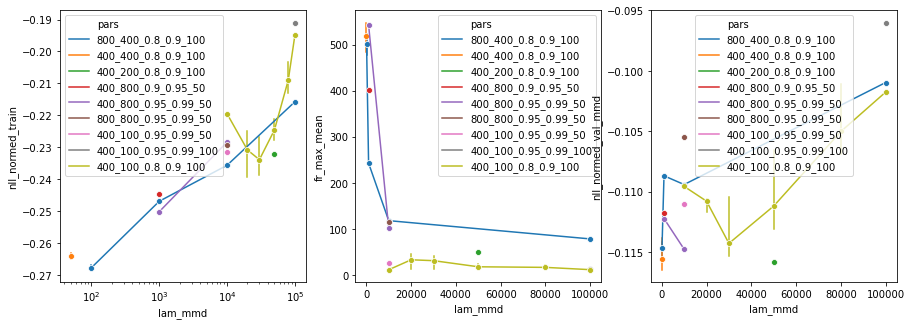

In [117]:
data = df[df.nll_normed_train < 0].copy()
# data = data[((data.initialization == 'ml') & (data.lr == 4e-3) & ((data.beta0 - 0.9).abs() < 1e-3) & ((data.beta1 - 0.95).abs() < 1e-3)) |\
#             ((data.initialization == 'zero') & (data.lr == 1e-2))]
data = data[(data.initialization == 'zero') & (data.lr == 1e-2)]
data['pars'] = data.num_epochs.astype(str).str[:] + '_' + data.n_batch_fr.astype(str).str[:] + '_' + data.beta0.round(2).astype(str).str[:] + '_' + data.beta1.round(2).astype(str).str[:] + '_' + \
               data.kernel_kwargs.str[0].round(0).astype(int).astype(str)
# data = data[data.num_epochs.isin([400]) & (data.n_batch_fr == 40)]
# data = data[(data.num_epochs == 700) & (data.n_batch_fr == 400)]
# data = data[(data.beta0 - 0.95).abs() < 1e-3]
# data = data[(data.beta1 - 0.99).abs() < 1e-3]

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)

sns.lineplot(x='lam_mmd', y='nll_normed_train', hue='pars', err_style='bars', marker='o', ci=95, data=data, ax=ax1)
sns.lineplot(x='lam_mmd', y='fr_max_mean', hue='pars', err_style='bars',  marker='o', ci=95, data=data, ax=ax2)
sns.lineplot(x='lam_mmd', y='nll_normed_val_mmd', hue='pars', estimator=np.median, err_style='bars',  marker='o', ci=95, data=data, ax=ax3)

ax1.set_xscale('log')

# display(data.loc[(data.nll_normed_train - -0.15).abs() < 0.02, ['mmd_mean', 'nll_normed_train', 'mmd_sd', 'lam_mmd', 'num_epochs', 'beta0', 'beta1', 'n_batch_fr', 'fr_mean_mean', 'fr_max_mean', 'initialization']])

## phi_exp_fr

In [79]:
df = df_summary.loc[(df_summary.ker_name == 'ker_expfr')].copy()

In [80]:
df.num_epochs.unique()

array([ 100,  400,  600,  700, 1200])

,mmd_mean,nll_normed_train,mmd_sd,lam_mmd,n_batch_fr,sd2,beta0,beta1,fr_mean_mean,fr_max_mean,initialization


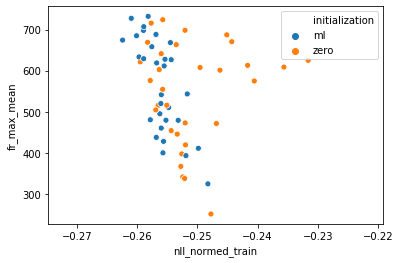

In [82]:
data = df.copy()# & (df.initialization == 'ml')]
data = data[data.num_epochs.isin([1200]) & data.lr.isin([1e-2]) & (data.n_batch_fr == 800)]
# data = data[(data.num_epochs == 700) & (data.n_batch_fr == 400)]
data = data[(data.beta0 == 0)]
data = data[(data.beta1 == 0)]

data['sd2'] = data['kernel_kwargs'].str[0]

ax = sns.scatterplot(x='nll_normed_train', y='fr_max_mean', hue='initialization', data=data[data.nll_normed_train < 0])
# ax = sns.scatterplot(x='sd2', y='fr_max_mean', hue='initialization', data=data[data.nll_normed_train < 0])
# ax.set_xscale('log')
# ax.set_yscale('log')

# display(data.loc[(data.nll_normed_train - -0.15).abs() < 0.02, ['mmd_mean', 'nll_normed_train', 'mmd_sd', 'lam_mmd', 'n_batch_fr', 'fr_mean_mean', 'fr_max_mean', 'initialization']])
display(data.loc[(data.fr_max_mean < 100), ['mmd_mean', 'nll_normed_train', 'mmd_sd', 'lam_mmd', 'n_batch_fr', 'sd2', 'beta0', 'beta1', 'fr_mean_mean', 'fr_max_mean', 'initialization']])

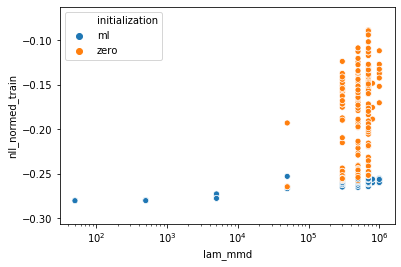

In [25]:
ax = sns.scatterplot(x='lam_mmd', y='nll_normed_train', hue='initialization', data=data[(data.nll_normed_train < 0)])#[data.initialization == 'zero'])
# ax = sns.scatterplot(x='sd2', y='nll_normed_train', hue='initialization', data=data[(data.nll_normed_train < 0)])#[data.initialization == 'zero'])
ax.set_xscale('log')

In [25]:
_data = data[(data.initialization == 'zero') & (data.num_epochs == 600) & (data.beta0 == 0) &\
             (data.beta1 == 0) & (data.sd2 == 1e3)]

_data[['mmd_mean', 'nll_normed_train', 'mmd_sd', 'lam_mmd', 'beta0', 'beta1', 'n_batch_fr', 'fr_mean_mean', 'fr_max_mean', 'initialization']]
_data.groupby('lam_mmd')['nll_normed_train'].agg(['mean', 'std'])

,mean,std
lam_mmd,,
50000.0,-0.264494,NaN
300000.0,-0.209752,NaN
500000.0,-0.171939,0.015139
700000.0,-0.164183,0.013091
800000.0,-0.148455,NaN
1000000.0,-0.137855,0.015405


In [65]:
data = df[(df.ker_name == 'ker_expfr') & (df.initialization == 'ml')]

In [66]:
np.sort(data.lam_mmd.unique())

array([5.e+01, 5.e+02, 5.e+03, 5.e+04, 2.e+05, 3.e+05, 5.e+05, 8.e+05])

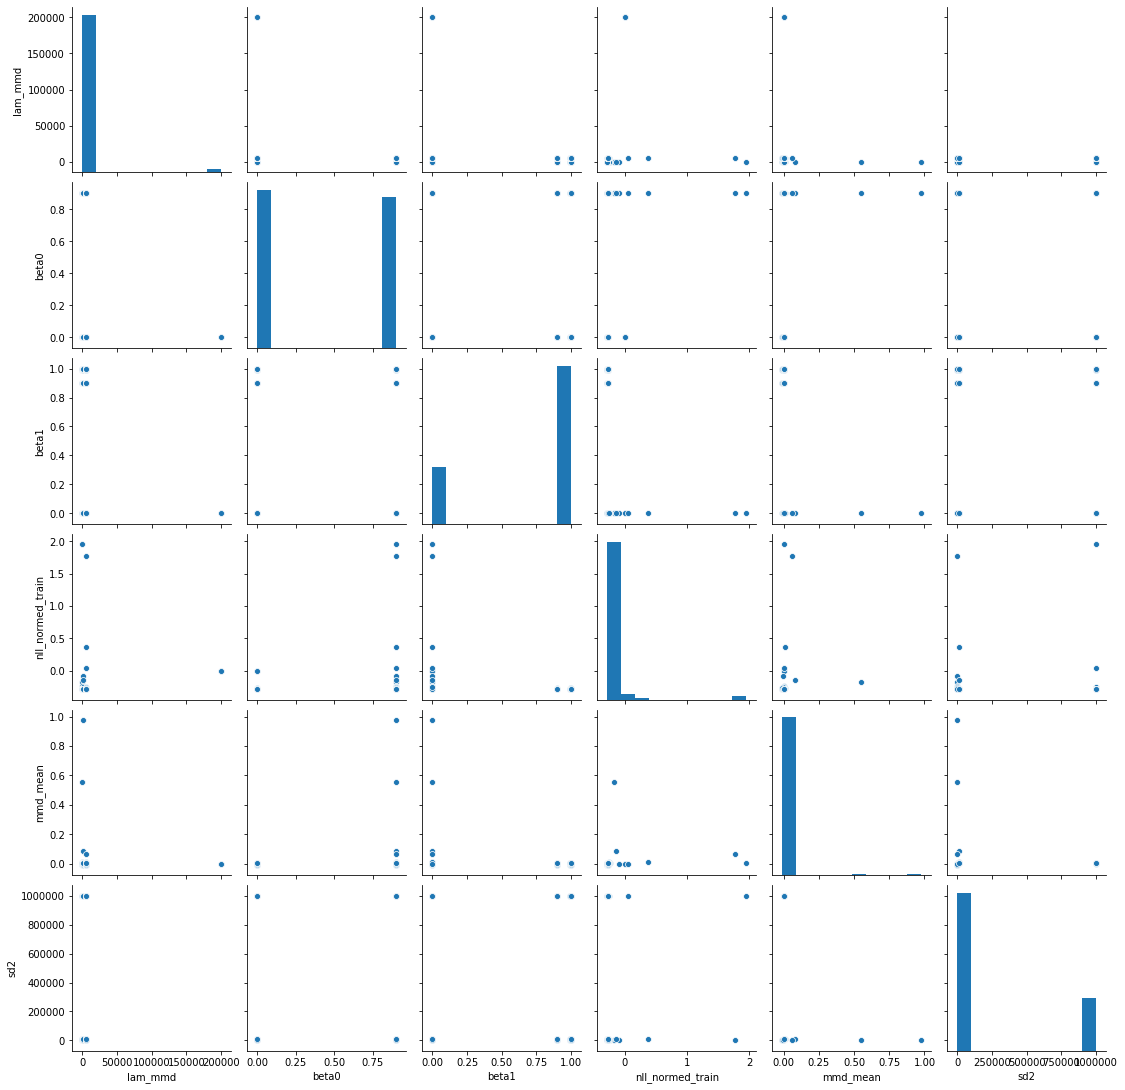

In [110]:
# sns.scatterplot(x='nll_normed_train', y='fr_max_mean', data=data)
# sns.scatterplot(x='lam_mmd', y='nll_normed_train', data=data)
sns.pairplot(data[['lam_mmd', 'beta0', 'beta1', 'nll_normed_train', 'mmd_mean', 'sd2']])